Контрольна робота #2<br/>
<a href="https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016">Ресурс</a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
DataFile = pd.read_csv("master.csv")
import gc

# Підготовка даних

In [6]:
DataFile.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [7]:
DataFile.shape

(27820, 12)

In [8]:
features = [c for c in DataFile.columns if c not in ['population','suicides_no']]


Як можна помітити, я вилучив номер самогубства, оскільки данан колонка не несе потрібної інформації, не враховуючи населення. Натомість Suicide / 100k pop матиме набагато більше сенсу.
 

In [9]:
NewData = DataFile[features]

# Групуємо за Віком та Статтю

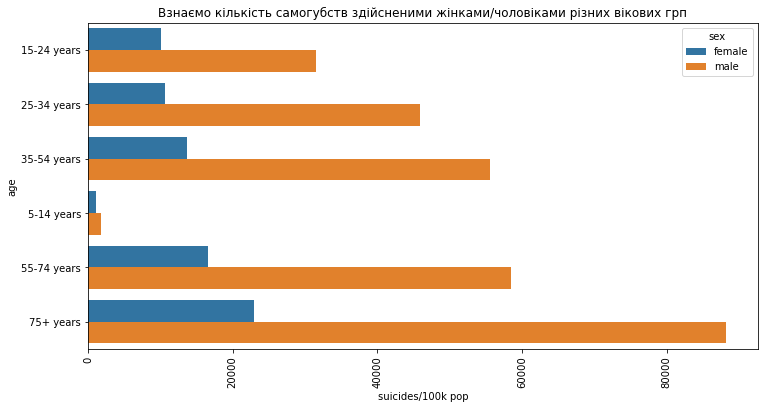

In [16]:
plt.figure(figsize=(12, 6));
Age_Country = pd.DataFrame(NewData.groupby(['age','sex'],sort=True)['suicides/100k pop'].sum()).reset_index()
plot1 = Age_Country.sort_values(by=['suicides/100k pop','age'], ascending=False)
plot1.reset_index()
g = sns.barplot(x='suicides/100k pop', y='age', data=Age_Country, hue = 'sex');
plt.xticks(rotation=90)

plt.title('Досліджуєм випадки скоєння самогубств, здійсненими жінками/чоловіками різних вікових грп');

Можемо побачити, що кількість самогубств, скоєних чоловіками, значно вища порівняно з жінками

# Групуємо за Проміком Часу та Віком

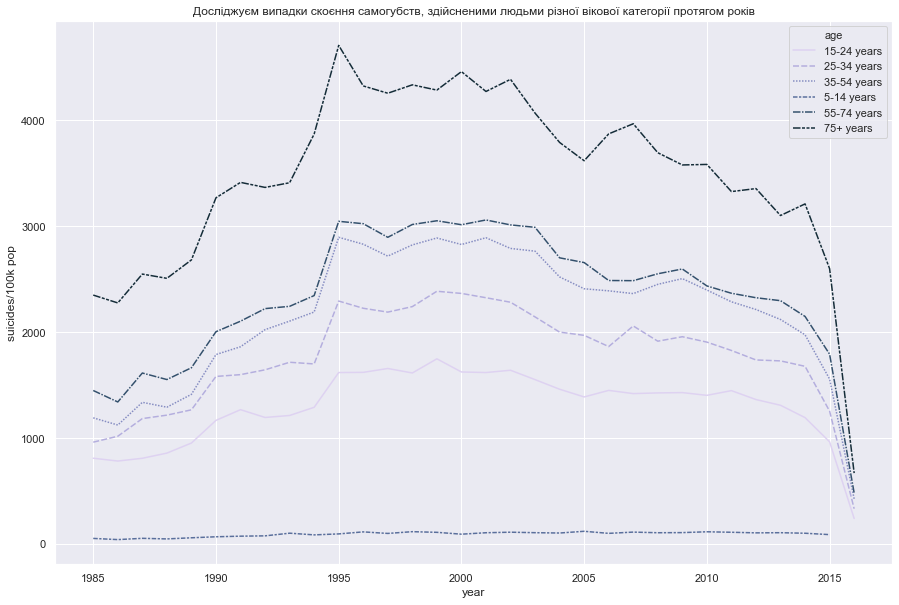

In [29]:
from matplotlib.colors import LogNorm
timeseries = pd.DataFrame(NewData.groupby(['year','age'])['suicides/100k pop'].sum()).reset_index()
timeseries['age'] = timeseries.age.astype(pd.api.types.CategoricalDtype(categories = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']))
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot('year','suicides/100k pop',hue='age',style='age',data=timeseries,palette="ch:2.5,.25",sort=False)
plt.title('Досліджуєм випадки скоєння самогубств, здійсненими людьми різної вікової категорії протягом років');

Даний графік інформує нас про вищі суїцидальні тенденції у вищій віковій групі між 1985 і 1995 роками. Але ця тенденція зменшилась після 1995 р., подім відбувся незачний стрибок між 2005 - 2008 рр.

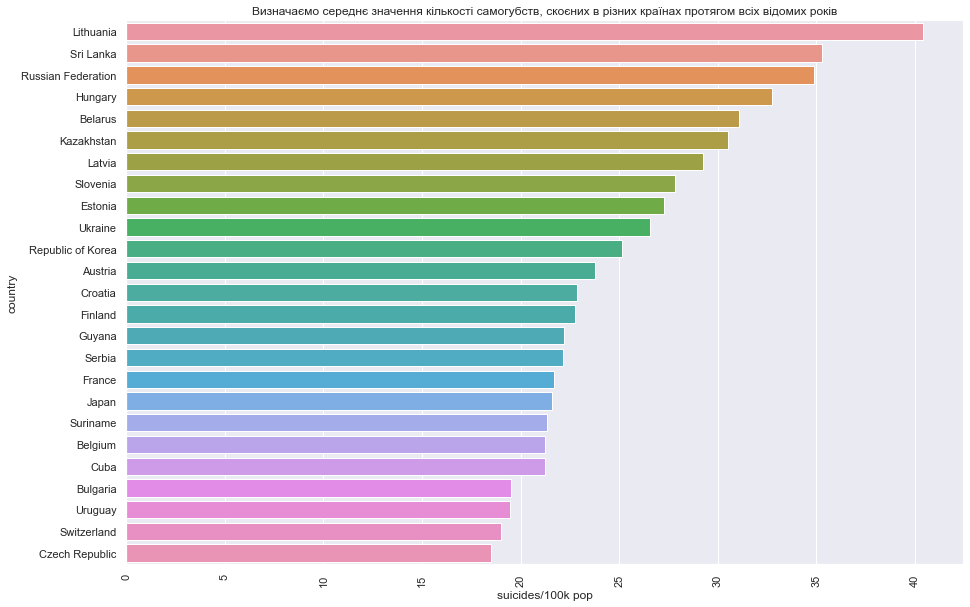

In [30]:
suicide_ctry = pd.DataFrame(NewData.groupby(['country'])['suicides/100k pop'].mean()).reset_index()
plot2 = suicide_ctry.sort_values(by=['suicides/100k pop','country'], ascending=False).head(25)
plot2.reset_index()
g = sns.barplot(x='suicides/100k pop', y='country', data=plot2);
plt.xticks(rotation=90)
plt.title('Визначаємо середнє значення кількості самогубств, скоєних в різних країнах протягом всіх відомих років');

Виходячи з отриманого результату, можна свідчити що кількість випадків самогубств в багатших країних нижчий, ніж у бідніших. Доведемо це:

# Самогубства за ВВП Країни

In [9]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import MinMaxScaler

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [10]:
num_pipeline = Pipeline([
       ("selector", DataFrameSelector(['gdp_per_capita ($)','suicides/100k pop'])),
       ('min_max_scaler', MinMaxScaler()),
     ])

no_pipeline = Pipeline([
        ("selector", DataFrameSelector(["country","year"]))
    ])

In [11]:
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ])

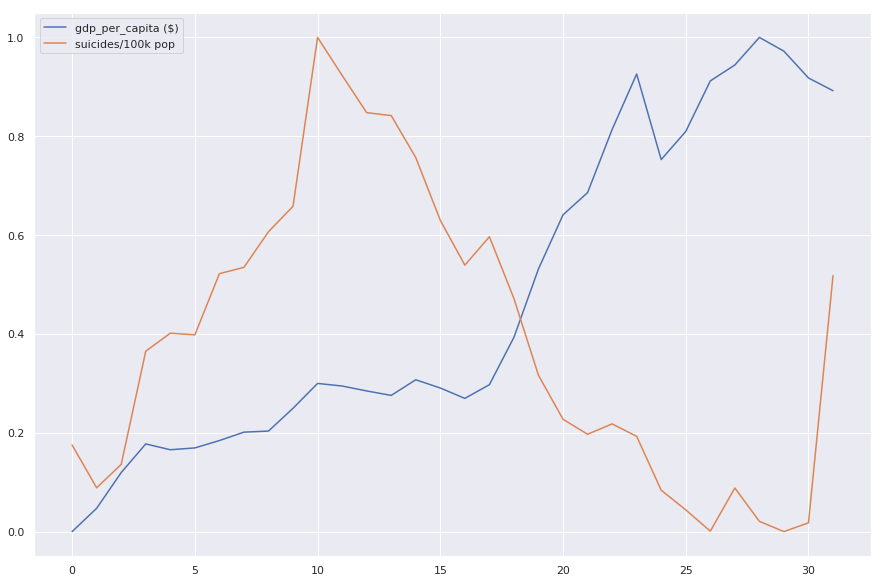

In [12]:
NewData_plot3 = NewData.pivot_table(['suicides/100k pop','gdp_per_capita ($)'],['year'], aggfunc='mean')

Scaled_Data = full_pipeline.fit_transform(NewData_plot3)
NewData_Scaled_Data = pd.DataFrame(Scaled_Data)

NewData_Scaled_Data.columns  = ['gdp_per_capita ($)','suicides/100k pop']
NewData_Scaled_Data.plot()

Як і очікувалось, збільшення ВВП призвело до зниження рівня самогубств і наоборот.

Дякую за увагу